<a href="https://colab.research.google.com/github/NgaAdrain/TEAM_Enter_Text_Here/blob/master/20200809_Deep_Learning_Model_With_DNNnCNN_WITH_ROTATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1>**Deep Learning With CNN & DNN**</h1>

##**Module Import**


In [1]:
# Import the TensorFlow
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

https://tykimos.github.io/2017/06/10/Model_Save_Load/
<br>
모델 저장 및 가중치 저장 & 불러와서 사용하기

##**File Read**

###<h2>학습용 데이터 읽기</h2>

In [8]:
train_file = pd.read_csv('/content/train_input_with_rotate_r.csv',encoding='utf-8')
#train_file = pd.read_csv('/content/train_input_with_rotate_r_data_mod.csv',encoding='utf-8')
#train_file = pd.read_csv('/content/real_data_with_rotate_1.csv',encoding='utf-8')
train_file_label = train_file.pop('Label')
train_file.drop(['Timestamp','Winker(left)','Winker(right)','Timecheck'],axis = 'columns',inplace = True)

###<h2>시뮬레이션 테스트 데이터는 test_input.csv의 형식으로 저장한다.</h2>

In [2]:
test_file = pd.read_csv('/content/test_data_with_rotate_r.csv',encoding='utf-8')
#test_file = pd.read_csv('/content/test_data_with_rotate_r_data_mod.csv',encoding='utf-8')
test_file_time = test_file.pop('Timestamp')
test_file_label = test_file.pop('Label')
test_file.drop(['Winker(left)','Winker(right)','Timecheck'],axis = 'columns',inplace = True)

###<h2>실제 데이터는 real_data.csv의 형식으로 저장한다.</h2>

In [3]:
real_file = pd.read_csv('/content/real_no_regularization.csv',encoding='utf-8')
#real_file = pd.read_csv('/content/real_data_with_rotate.csv',encoding='utf-8')
#real_file = pd.read_csv('/content/real_data_with_rotate_2.csv',encoding='utf-8')
real_file_label = real_file.pop('Label')

##**DataFrame 2 Numpy Array**


###<h2>학습용 데이터 변환</h2>

In [9]:
train_array = np.delete(train_file.values,-1,0).astype(np.float)
train_label = np.delete(train_file_label.values,-1,0).astype(np.int)

###<h2>테스트 데이터 변환</h2>


In [4]:
test_array = np.delete(test_file.values,-1,0).astype(np.float)
test_label = np.delete(test_file_label.values,-1,0).astype(np.int)
test_time = np.delete(test_file_time.values,-1,0)

###<h2>실제 데이터 변환</h2>

In [5]:
real_array = np.delete(real_file.values,-1,0).astype(np.float)
real_label = np.delete(real_file_label.values,-1,0).astype(np.int)

###<h2>30Hz->10Hz로 데이터 갯수 맞추기</h2>

형진이가 만든 10hz변환기를 통과한 학습용 파일에는 필요가 없다!

=> 30Hz로 부터 10Hz의 데이터 3개를 뽑아낸다!

####<h3>학습용 데이터</h3>

In [10]:
train_10hz_array = []
train_10hz_label = []
count = 0
for temp in train_array:
  if(count%3 == 1):
    train_10hz_array.append(train_array[count,:])
    train_10hz_label.append(train_label[count])
  count = count + 1
count = 0
for temp in train_array:
  if(count%3 == 0):
    train_10hz_array.append(train_array[count,:])
    train_10hz_label.append(train_label[count])
  count = count + 1
count = 0
for temp in train_array:
  if(count%3 == 2):
    train_10hz_array.append(train_array[count,:])
    train_10hz_label.append(train_label[count])
  count = count + 1
train_array = np.array(train_10hz_array)
train_label = np.array(train_10hz_label)
print(len(train_array))
print(len(train_label))

312145
312145


####<h3>테스트 데이터</h3>

In [6]:
test_10hz_array = []
test_10hz_label = []
count = 0
for temp in test_array:
  if(count%3 == 1):
    test_10hz_array.append(test_array[count,:])
    test_10hz_label.append(test_label[count])
  count = count + 1
count = 0
for temp in test_array:
  if(count%3 == 0):
    test_10hz_array.append(test_array[count,:])
    test_10hz_label.append(test_label[count])
  count = count + 1
count = 0
for temp in test_array:
  if(count%3 == 2):
    test_10hz_array.append(test_array[count,:])
    test_10hz_label.append(test_label[count])
  count = count + 1
test_array = np.array(test_10hz_array)
test_label = np.array(test_10hz_label)
#print(test_array)
print(len(test_label))

18098


###<h2>데이터 길이</h2>

In [11]:
length_test = int(len(test_array)/25)
length_train = int(len(train_array)/25)
length_real = int(len(real_array)/25)

##**데이터 정규화**

###<h2>사용 상수</h2>

In [7]:
VELOCITY = 0
ACCEL_X = 1
ROT_Z = 2
STEERING = 3 
ACCEL = 4
BRAKE = 5
NOR_MAX = 31.75
NOR_MIN = -32
VELOCITY_MAX = 100
VELOCITY_MIN = 0
ACCEL_X_MAX =  1.5
ACCEL_X_MIN = -1.5
ROT_Z_MAX = 45
ROT_Z_MIN = -45
STEERING_MAX = 250
STEERING_MIN = -225
ACCEL_MAX = 70
ACCEL_MIN = 0
BRAKE_MAX = 50
BRAKE_MIN = 0

Rotate_Z 부호 바꾸기(부호처리된 파일로 부터 나온것은 할 필요 X)

In [12]:
for i in range(len(train_array)):
  #train_array[i][VELOCITY] = train_array[i][VELOCITY] / 2
  #train_array[i][ACCEL_X] = train_array[i][ACCEL_X] / 2
  train_array[i][ROT_Z] = -1 * train_array[i][ROT_Z]
for i in range(len(test_array)):
  test_array[i][ROT_Z] = -1 * test_array[i][ROT_Z]
  #test_array[i][VELOCITY] = test_array[i][VELOCITY] / 2
  #test_array[i][ACCEL_X] = test_array[i][ACCEL_X] / 2

Z-SCORE 표준화 작업

In [13]:
#Z-Score Standardization
train_mean = np.mean(train_array,axis = 0)
train_std = np.std(train_array,axis = 0)
test_mean = np.mean(test_array,axis = 0)
test_std = np.std(test_array,axis = 0)
real_mean = np.mean(real_array,axis = 0)
real_std = np.std(real_array,axis = 0)
train = (train_array - train_mean)/train_std
test = (test_array - test_mean)/test_std
real = (real_array - real_mean)/real_std

 -1 ~ 1 정규화 작업  ☞ 아래의 정규화 작업 대신 진행

In [14]:
norm = np.concatenate((train,test,real), axis=0).max(axis=0)
train = train / norm
test = test / norm
real = real / norm

###<h2>학습용 데이터 정규화</h2>

- <h3>실제 데이터의 정규화내용</h3>
1. steering wheel  -> 31.75(270,-270) ~ -32
2. brake -> 31.75(50,0) ~ -32
3. speed(velocity) -> 31.75(100,0) ~ -32
4. accel -> 31.75(70,0) ~ -32
5. yaw_rate(Rotate_Z) -> 31.75(45,-45) ~ -32
6. accelaration_lateral(X) -> 31.75(0.6,-0.6) ~ -32

In [ ]:
print("Process 1-1 Velocity[",end="")
for i in range(len(train_array)):
  train_array[i][VELOCITY] = round(train_array[i][VELOCITY],0)
  if(i%length_train==0):
    print("#",end="")
  if(train_array[i][VELOCITY]>=VELOCITY_MAX):    #MAX
    train_array[i][VELOCITY] = NOR_MAX
  elif(train_array[i][VELOCITY]>=(VELOCITY_MAX/2)):   #MID
    train_array[i][VELOCITY] = round(((train_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*NOR_MAX),2)
  elif(train_array[i][VELOCITY]>VELOCITY_MIN):     #MIN
    train_array[i][VELOCITY] = round(((train_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*(-1*NOR_MIN)),2)
  else:
    train_array[i][VELOCITY] = NOR_MIN
print("]\nProcess 1-2 Accel_X [",end="")
for i in range(len(train_array)):
  if(i%length_train==0):
    print("#",end="")  
  if(train_array[i][ACCEL_X]>=ACCEL_X_MAX):     #MAX
    train_array[i][ACCEL_X] = NOR_MAX
  elif(train_array[i][ACCEL_X]>= 0):    #MID
    train_array[i][ACCEL_X] = round(((train_array[i][ACCEL_X])/ACCEL_X_MAX*NOR_MAX),2)
  elif(train_array[i][ACCEL_X]> ACCEL_X_MIN):  #MIN
    train_array[i][ACCEL_X] = round(((train_array[i][ACCEL_X])/ACCEL_X_MAX*(-1*NOR_MIN)),2)
  else:
    train_array[i][ACCEL_X] = NOR_MIN
print("]\nProcess 1-3 ROTATE_Z[",end="")
for i in range(len(train_array)):
  if(i%length_train==0):
    print("#",end="")
  if(train_array[i][ROT_Z]>=ROT_Z_MAX):       #MAX
    train_array[i][ROT_Z] = NOR_MAX
  elif(train_array[i][ROT_Z]>= 0):    #MID
    train_array[i][ROT_Z] = round(((train_array[i][ROT_Z])/ROT_Z_MAX*NOR_MAX),2)
  elif(train_array[i][ROT_Z]>ROT_Z_MIN):     #MIN
    train_array[i][ROT_Z] = round(((train_array[i][ROT_Z])/ROT_Z_MAX*(-1*NOR_MIN)),2)
  else:
    train_array[i][ROT_Z] = NOR_MIN
print("]\nProcess 1-4 Steering[",end="")
for i in range(len(train_array)):
  if(i%length_train==0):
    print("#",end="")  
  if(train_array[i][STEERING]>=STEERING_MAX):    #MAX
    train_array[i][STEERING] = NOR_MAX
  elif(train_array[i][STEERING]>= 0):   #MID
    train_array[i][STEERING] = round(((train_array[i][STEERING])/STEERING_MAX*NOR_MAX),2)
  elif(train_array[i][STEERING]> STEERING_MIN): #MIN
    train_array[i][STEERING] = round(((train_array[i][STEERING])/STEERING_MAX*(-1*NOR_MIN)),2)
  else:
    train_array[i][STEERING] = NOR_MIN
print("]\nProcess 1-5 Accelpad[",end="")
for i in range(len(train_array)):
  if(i%length_train==0):
    print("#",end="")  
  if(train_array[i][ACCEL]>=ACCEL_MAX):        #MAX
    train_array[i][ACCEL] = NOR_MAX
  elif(train_array[i][ACCEL]>= (ACCEL_MAX/2)):     #MID
    train_array[i][ACCEL] = round(((train_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*NOR_MAX),2)
  elif(train_array[i][ACCEL]> ACCEL_MIN):       #MIN
    train_array[i][ACCEL] = round(((train_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*(-1*NOR_MIN)),2)
  else:
    train_array[i][ACCEL] = NOR_MIN
print("]\nProcess 1-6 Brakepad[",end="")
for i in range(len(train_array)):
  if(i%length_train==0):
    print("#",end="")
  if(train_array[i][BRAKE]>=BRAKE_MAX):        #MAX
    train_array[i][BRAKE] = NOR_MAX
  elif(train_array[i][BRAKE]>= (BRAKE_MAX/2)):     #MID
    train_array[i][BRAKE] = round(((train_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*NOR_MAX),2)
  elif(train_array[i][BRAKE]> BRAKE_MIN):       #MIN
    train_array[i][BRAKE] = round(((train_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*(-1*NOR_MIN)),2)
  else:
    train_array[i][BRAKE] = NOR_MIN
print("]\nProcess 1 Clear")

Process 1-1 Velocity[##########################]
Process 1-2 Accel_X [##########################]
Process 1-3 ROTATE_Z[##########################]
Process 1-4 Steering[##########################]
Process 1-5 Accelpad[##########################]
Process 1-6 Brakepad[##########################]
Process 1 Clear


###<h2>테스트 데이터 정규화</h2>

- <h3>시뮬레이터 값의 범위</h3>
1. Velocity : 0 ~ 240 -> 31.75(100,0) ~ -32
2. Acceleration.<br>
X -> 차가 왼쪽으로 이동하면 감소 오른쪽으로 이동하면 증가 -> 31.75(0.6,-0.6) ~ -32
3. Rotation.<br>
Z -> 차의 좌우 이동에 맞춰서 변화 -> 10000을 곱한 값이 yaw rate와 비슷
4. Steering_wheel : -1 ~ 1 => -450 ~ 450(degree) -> 31.75(225,-225) ~ -32
5. Brake : 0 ~ 1 => 0 ~ 100% -> 31.75(50,0) ~ -32
6. Accel : 0 ~ 1 => 0 ~ 100% -> 31.75(70,0) ~ -32<br>

In [ ]:
print("Process 2-1 Velocity[",end="")
for i in range(len(test_array)):
  test_array[i][VELOCITY] = round(test_array[i][VELOCITY],0)
  if(i%length_test==0):
    print("#",end="")
  if(test_array[i][VELOCITY]>=VELOCITY_MAX):    #MAX
    test_array[i][VELOCITY] = NOR_MAX
  elif(test_array[i][VELOCITY]>=(VELOCITY_MAX/2)):   #MID
    test_array[i][VELOCITY] = round(((test_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*NOR_MAX),2)
  elif(test_array[i][VELOCITY]>VELOCITY_MIN):     #MIN
    test_array[i][VELOCITY] = round(((test_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*(-1*NOR_MIN)),2)
  else:
    test_array[i][VELOCITY] = NOR_MIN
print("]\nProcess 2-2 Accel_X [",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")  
  if(test_array[i][ACCEL_X]>=ACCEL_X_MAX):     #MAX
    test_array[i][ACCEL_X] = NOR_MAX
  elif(test_array[i][ACCEL_X]>= 0):    #MID
    test_array[i][ACCEL_X] = round(((test_array[i][ACCEL_X])/ACCEL_X_MAX*NOR_MAX),2)
  elif(test_array[i][ACCEL_X]> ACCEL_X_MIN):  #MIN
    test_array[i][ACCEL_X] = round(((test_array[i][ACCEL_X])/ACCEL_X_MAX*(-1*NOR_MIN)),2)
  else:
    test_array[i][ACCEL_X] = NOR_MIN
print("]\nProcess 2-3 ROTATE_Z [",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")
  if(test_array[i][ROT_Z]>=ROT_Z_MAX):       #MAX
    test_array[i][ROT_Z] = NOR_MAX
  elif(test_array[i][ROT_Z]>= 0):    #MID
    test_array[i][ROT_Z] = round(((test_array[i][ROT_Z])/ROT_Z_MAX*NOR_MAX),2)
  elif(test_array[i][ROT_Z]>ROT_Z_MIN):     #MIN
    test_array[i][ROT_Z] = round(((test_array[i][ROT_Z])/ROT_Z_MAX*(-1*NOR_MIN)),2)
  else:
    test_array[i][ROT_Z] = NOR_MIN
print("]\nProcess 2-4 Steering[",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")  
  if(test_array[i][STEERING]>=STEERING_MAX):    #MAX
    test_array[i][STEERING] = NOR_MAX
  elif(test_array[i][STEERING]>= 0):   #MID
    test_array[i][STEERING] = round(((test_array[i][STEERING])/STEERING_MAX*NOR_MAX),2)
  elif(test_array[i][STEERING]> STEERING_MIN): #MIN
    test_array[i][STEERING] = round(((test_array[i][STEERING])/STEERING_MAX*(-1*NOR_MIN)),2)
  else:
    test_array[i][STEERING] = NOR_MIN
print("]\nProcess 2-5 Accelpad[",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")  
  if(test_array[i][ACCEL]>=ACCEL_MAX):        #MAX
    test_array[i][ACCEL] = NOR_MAX
  elif(test_array[i][ACCEL]>= (ACCEL_MAX/2)):     #MID
    test_array[i][ACCEL] = round(((test_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*NOR_MAX),2)
  elif(test_array[i][ACCEL]> ACCEL_MIN):       #MIN
    test_array[i][ACCEL] = round(((test_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*(-1*NOR_MIN)),2)
  else:
    test_array[i][ACCEL] = NOR_MIN
print("]\nProcess 2-6 Brakepad[",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")
  if(test_array[i][BRAKE]>=BRAKE_MAX):        #MAX
    test_array[i][BRAKE] = NOR_MAX
  elif(test_array[i][BRAKE]>= (BRAKE_MAX/2)):     #MID
    test_array[i][BRAKE] = round(((test_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*NOR_MAX),2)
  elif(test_array[i][BRAKE]> BRAKE_MIN):       #MIN
    test_array[i][BRAKE] = round(((test_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*(-1*NOR_MIN)),2)
  else:
    test_array[i][BRAKE] = NOR_MIN
print("]\nProcess 2 Clear")

Process 2-1 Velocity[##########################]
Process 2-2 Accel_X [##########################]
Process 2-3 ROTATE_Z [##########################]
Process 2-4 Steering[##########################]
Process 2-5 Accelpad[##########################]
Process 2-6 Brakepad[##########################]
Process 2 Clear


###<h2>실제 데이터 정규화</h2>

In [ ]:
print("Process 3-1 Velocity[",end="")
for i in range(len(real_array)):
  real_array[i][VELOCITY] = round(real_array[i][VELOCITY],0)
  if(i%length_real==0):
    print("#",end="")
  if(real_array[i][VELOCITY]>=VELOCITY_MAX):    #MAX
    real_array[i][VELOCITY] = NOR_MAX
  elif(real_array[i][VELOCITY]>=(VELOCITY_MAX/2)):   #MID
    real_array[i][VELOCITY] = round(((real_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*NOR_MAX),2)
  elif(real_array[i][VELOCITY]>VELOCITY_MIN):     #MIN
    real_array[i][VELOCITY] = round(((real_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*(-1*NOR_MIN)),2)
  else:
    real_array[i][VELOCITY] = NOR_MIN
print("]\nProcess 3-2 Accel_X [",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")  
  if(real_array[i][ACCEL_X]>=ACCEL_X_MAX):     #MAX
    real_array[i][ACCEL_X] = NOR_MAX
  elif(real_array[i][ACCEL_X]>= 0):    #MID
    real_array[i][ACCEL_X] = round(((real_array[i][ACCEL_X])/ACCEL_X_MAX*NOR_MAX),2)
  elif(real_array[i][ACCEL_X]> ACCEL_X_MIN):  #MIN
    real_array[i][ACCEL_X] = round(((real_array[i][ACCEL_X])/ACCEL_X_MAX*(-1*NOR_MIN)),2)
  else:
    real_array[i][ACCEL_X] = NOR_MIN
print("]\nProcess 3-3 ROTATE_Z [",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")
  if(real_array[i][ROT_Z]>=ROT_Z_MAX):       #MAX
    real_array[i][ROT_Z] = NOR_MAX
  elif(real_array[i][ROT_Z]>= 0):    #MID
    real_array[i][ROT_Z] = round(((real_array[i][ROT_Z])/ROT_Z_MAX*NOR_MAX),2)
  elif(real_array[i][ROT_Z]>ROT_Z_MIN):     #MIN
    real_array[i][ROT_Z] = round(((real_array[i][ROT_Z])/ROT_Z_MAX*(-1*NOR_MIN)),2)
  else:
    real_array[i][ROT_Z] = NOR_MIN
print("]\nProcess 3-4 Steering[",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")  
  if(real_array[i][STEERING]>=STEERING_MAX):    #MAX
    real_array[i][STEERING] = NOR_MAX
  elif(real_array[i][STEERING]>= 0):   #MID
    real_array[i][STEERING] = round(((real_array[i][STEERING])/STEERING_MAX*NOR_MAX),2)
  elif(real_array[i][STEERING]> STEERING_MIN): #MIN
    real_array[i][STEERING] = round(((real_array[i][STEERING])/STEERING_MAX*(-1*NOR_MIN)),2)
  else:
    real_array[i][STEERING] = NOR_MIN
print("]\nProcess 3-5 Accelpad[",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")  
  if(real_array[i][ACCEL]>=ACCEL_MAX):        #MAX
    real_array[i][ACCEL] = NOR_MAX
  elif(real_array[i][ACCEL]>= (ACCEL_MAX/2)):     #MID
    real_array[i][ACCEL] = round(((real_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*NOR_MAX),2)
  elif(real_array[i][ACCEL]> ACCEL_MIN):       #MIN
    real_array[i][ACCEL] = round(((real_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*(-1*NOR_MIN)),2)
  else:
    real_array[i][ACCEL] = NOR_MIN
print("]\nProcess 3-6 Brakepad[",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")
  if(real_array[i][BRAKE]>=BRAKE_MAX):        #MAX
    real_array[i][BRAKE] = NOR_MAX
  elif(real_array[i][BRAKE]>= (BRAKE_MAX/2)):     #MID
    real_array[i][BRAKE] = round(((real_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*NOR_MAX),2)
  elif(real_array[i][BRAKE]> BRAKE_MIN):       #MIN
    real_array[i][BRAKE] = round(((real_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*(-1*NOR_MIN)),2)
  else:
    real_array[i][BRAKE] = NOR_MIN
print("]\nProcess 3 Clear")

Process 3-1 Velocity[##########################]
Process 3-2 Accel_X [##########################]
Process 3-3 ROTATE_Z [##########################]
Process 3-4 Steering[##########################]
Process 3-5 Accelpad[##########################]
Process 3-6 Brakepad[##########################]
Process 3 Clear


###<h2>Data Shuffle</h2>

In [ ]:
random_index = np.random.choice(train_array.shape[0],train_label.shape[0])
print(random_index)
train_array_s = train_array[random_index]
train_label_s = train_label[random_index]

[ 25091  76302 156614 ... 105471 123017 277418]


##**데이터셋 만들기**

###<h1>사용 상수</h1>

In [15]:
#초당 32개의 데이터가 나옴.(30~32Hz) => 10Hz 획일화함.
WINDOW_SIZE = 48 #4.8초 분량

###<h2>Deep Neural Network Dataset</h2>

####<h2>학습용 데이터셋</h2>

In [16]:
#30hz
train_dataset_data = []
train_dataset_label = []
for i in range(WINDOW_SIZE, train_array.shape[0] + 1, 1):
  train_dataset_data.append(train_array[i-WINDOW_SIZE:i])
  train_dataset_label.append(train_label[i-1])
#for i in range(WINDOW_SIZE, train.shape[0] + 1, 1):
#  train_dataset_data.append(train[i-WINDOW_SIZE:i])
#  train_dataset_label.append(train_label[i-1])
tr_data = np.array(train_dataset_data)
tr_label = np.array(train_dataset_label) 

print(tr_data.shape)
print(tr_label.shape)

(312098, 48, 6)
(312098,)


####<h2>테스트 데이터셋</h2>

In [17]:
#30hz
test_dataset_data = []
test_dataset_label = []
for i in range(WINDOW_SIZE, test_array.shape[0] + 1, 1):
  test_dataset_data.append(test_array[i-WINDOW_SIZE:i])
  test_dataset_label.append(test_label[i-1])
#for i in range(WINDOW_SIZE, test.shape[0] + 1, 1):
#  test_dataset_data.append(test[i-WINDOW_SIZE:i])
#  test_dataset_label.append(test_label[i-1])
te_data = np.array(test_dataset_data)
te_label = np.array(test_dataset_label) 
print(te_data.shape)

(18051, 48, 6)


####<h2>실제 데이터셋</h2>

In [18]:
real_dataset_data = []
real_dataset_label = []
for i in range(WINDOW_SIZE, real_array.shape[0] + 1, 1):
  real_dataset_data.append(real_array[i-WINDOW_SIZE:i])
  real_dataset_label.append(real_label[i-1])
#for i in range(WINDOW_SIZE, real.shape[0] + 1, 1):
#  real_dataset_data.append(real[i-WINDOW_SIZE:i])
#  real_dataset_label.append(real_label[i-1])
re_data = np.array(real_dataset_data)
re_label = np.array(real_dataset_label) 
print(re_data.shape)

(53214, 48, 6)


###<h2>Convolution Neural Network Dataset</h2>

####Shuffle된 데이터를 데이터셋화

In [ ]:
#30hz
train_dataset_data = []
train_dataset_label = []
for i in range(WINDOW_SIZE, train_array_s.shape[0] + 1, 1):
  train_dataset_data.append(train_array_s[i-WINDOW_SIZE:i])
  train_dataset_label.append(train_label_s[i-1])
tr_data_s = np.array(train_dataset_data)
tr_label_s = np.array(train_dataset_label) 

print(tr_data_s.shape)
print(tr_label_s.shape)

(314140, 48, 6)
(314140,)


####위의 np.array에 차원을 추가

In [19]:
##여기 구현
##TO DO: data의 구조를 (None,총 row수, WINDOW크기, 라벨수)로 바꿔야함. 4차원으로 변경
#tr_c_data = tr_data_s.reshape(-1,6,WINDOW_SIZE,1)
tr_c_data = tr_data.reshape(-1,6,WINDOW_SIZE,1)
te_c_data = te_data.reshape(-1,6,WINDOW_SIZE,1)
re_c_data = re_data.reshape(-1,6,WINDOW_SIZE,1)
print(tr_c_data.shape)

(312098, 6, 48, 1)


##**상태 분석 모델링**

###<h2>Deep Neural Network Model</h2>

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               36992     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_20 (Dense)             (None, 8)                

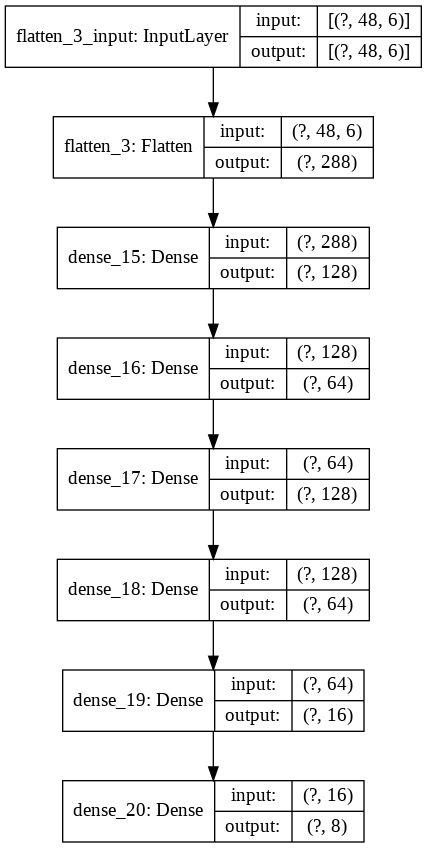

In [ ]:
dnn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(WINDOW_SIZE, 6)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64),
    keras.layers.Dense(128),
    keras.layers.Dense(64),
    keras.layers.Dense(16),
    keras.layers.Dense(8, activation='softmax')
])
dnn_model.summary()
dnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tf.keras.utils.plot_model(dnn_model, show_shapes=True)

###<h2>Convolution Neural Network Model</h2>

Convolution neural Network에서 합성곱 신경망의 필터를 통과할 때(Conv2D-> 2차원 필터) 데이터는 차원이 낮아지게 된다.<br>
NxN의 vector가 FxF의 필터를 통과하게되면 (N-F+1)x(N-F+1)로 줄어들게 된다.<br>
즉 지금 여기의 예시에서는 120(윈도우 크기) x 5를 3x3이 통과하게 되면 118 x 3으로 줄어든다.<br>
이를 MaxPool2D의 2x2필터를 통과하게 되면 117x2로 줄어들게 되며 다시한번 Conv2D의 2x2 필터를 통과하게 되면 116x1로 줄어들어서 더이상 Convolution필터를 통과할 수 없게 된다.<br>
이 때문에 많은 필터 layer를 추가하지 못하므로 이를 해결하기위해 padding 기술을 사용한다.<br>
padding기술은 각 edge의 값을 복사하여 각 방향으로 한 칸 늘려서 크기를 유지하는 기술이다.<br>
Conv2D에서는 padding을 사용하지 않는 valid, padding을 사용하는 same의 두가지를 지원한다. 이를 사용하면 많은 layer를 넣을 수 있다. 이를 이용하여 해결하였다.

STRIDE옵션

globalaveragepooling

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 48, 16)         160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 24, 32)         4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 24, 32)         9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 12, 64)         18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 12, 64)         36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 128)         73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 128)         1

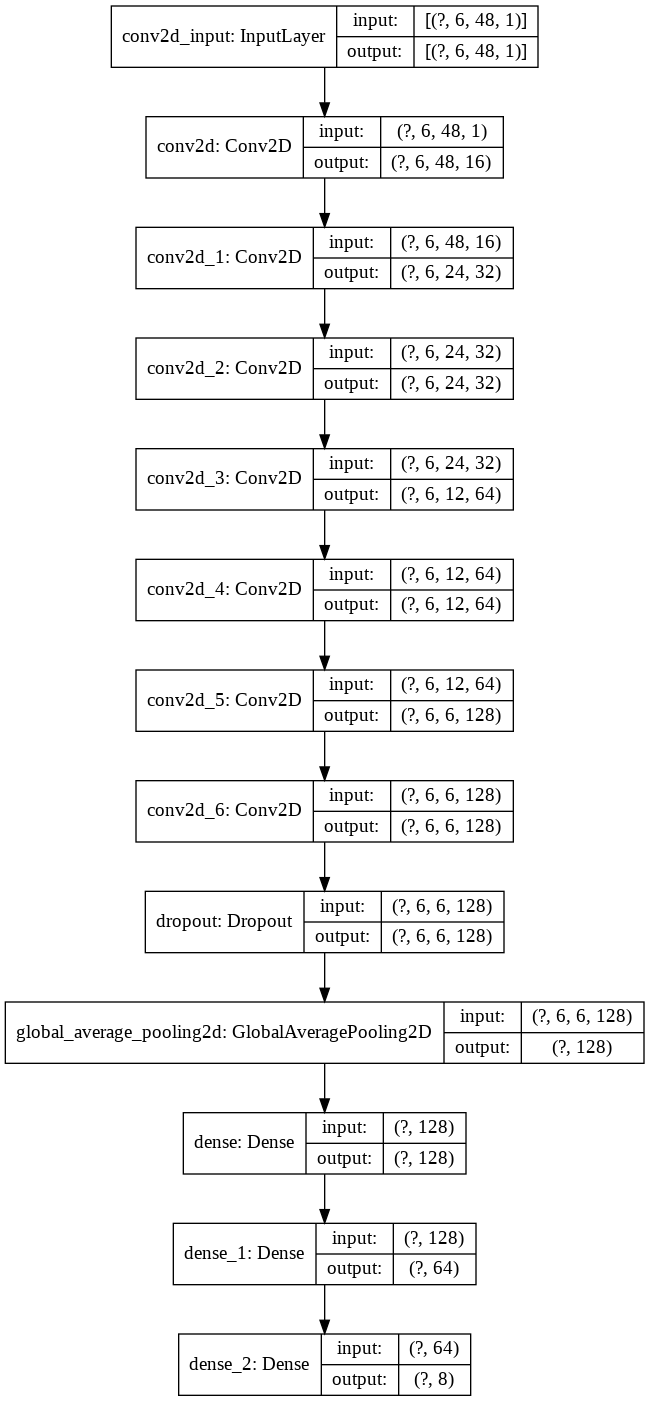

In [20]:
cnn_model_main = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu',input_shape = (6,WINDOW_SIZE,1)), # 전 단계 필터 수의 2배인 240개의 3x3 matrix filters
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(32,3,strides=(1,2),padding='same',activation='relu'),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'), # 전 단계 필터 수의 1/2배인 120개의 3x3 matrix filters
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(64,3,strides=(1,2),padding='same',activation='relu'),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.Conv2D(128,3,strides=(1,2),padding='same',activation='relu'),
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    keras.layers.Dropout(0.2),
    keras.layers.GlobalAveragePooling2D(),
    #keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(8, activation='softmax')  #stop 빼는 경우
])
cnn_model_main.summary()
cnn_model_main.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tf.keras.utils.plot_model(cnn_model_main, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 6, 48, 16)         160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 24, 32)         4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 24, 32)         9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 12, 64)         18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 12, 64)         36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 128)         73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 128)        

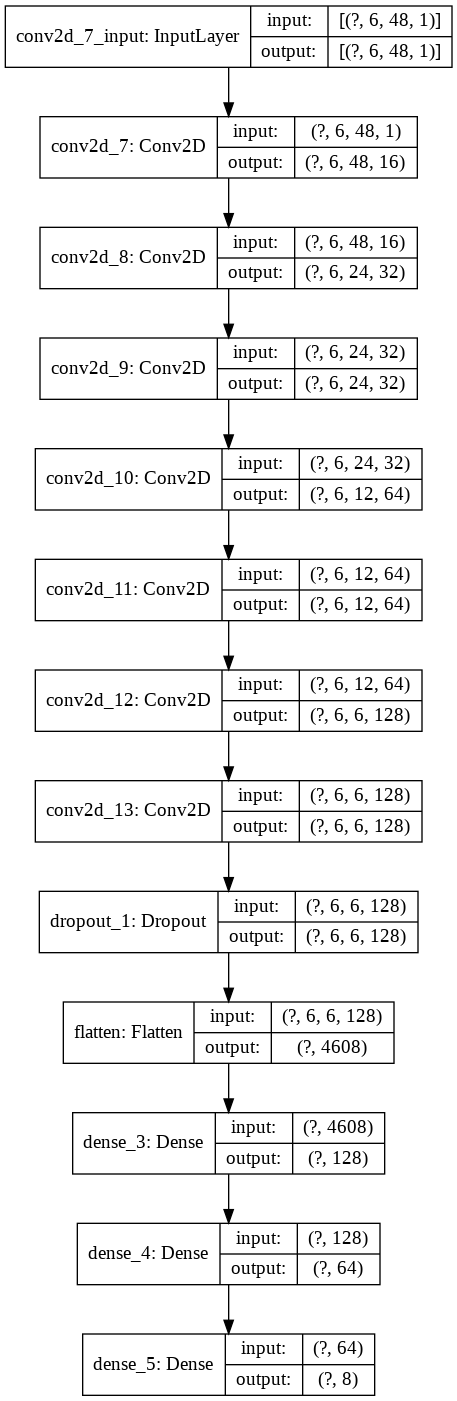

In [21]:
cnn_model_sub = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu',input_shape = (6,WINDOW_SIZE,1)), # 전 단계 필터 수의 2배인 240개의 3x3 matrix filters
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(32,3,strides=(1,2),padding='same',activation='relu'),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'), # 전 단계 필터 수의 1/2배인 120개의 3x3 matrix filters
    #keras.layers.Dropout(0.2),
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(64,3,strides=(1,2),padding='same',activation='relu'),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.Conv2D(128,3,strides=(1,2),padding='same',activation='relu'),
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    keras.layers.Dropout(0.3),
    #keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(8, activation='softmax')  #stop 빼는 경우
])
cnn_model_sub.summary()
cnn_model_sub.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tf.keras.utils.plot_model(cnn_model_sub, show_shapes=True)

##**모델 학습**

In [22]:
from sklearn.metrics import confusion_matrix

###DNN MODEL 학습

In [ ]:
dnn_history = dnn_model.fit(tr_data,tr_label,epochs=40,batch_size=32, validation_data=(re_data, re_label))

Epoch 1/40
1030/1030 [==============================] - 5s 5ms/step - loss: 0.7494 - accuracy: 0.8244 - val_loss: 0.4916 - val_accuracy: 0.8680
Epoch 2/40
1030/1030 [==============================] - 5s 4ms/step - loss: 0.4277 - accuracy: 0.8751 - val_loss: 0.4951 - val_accuracy: 0.8789
Epoch 3/40
1030/1030 [==============================] - 5s 4ms/step - loss: 0.3397 - accuracy: 0.9012 - val_loss: 0.5463 - val_accuracy: 0.8773
Epoch 4/40
1030/1030 [==============================] - 5s 4ms/step - loss: 0.2994 - accuracy: 0.9112 - val_loss: 0.4270 - val_accuracy: 0.9028
Epoch 5/40
1030/1030 [==============================] - 5s 4ms/step - loss: 0.2858 - accuracy: 0.9148 - val_loss: 0.4096 - val_accuracy: 0.8868
Epoch 6/40
1030/1030 [==============================] - 5s 4ms/step - loss: 0.2698 - accuracy: 0.9185 - val_loss: 0.3594 - val_accuracy: 0.9092
Epoch 7/40
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2601 - accuracy: 0.9228 - val_loss: 0.3909 - val_accuracy:

###CNN MODEL 학습

In [23]:
cnn_history_1 = cnn_model_main.fit(tr_c_data , tr_label , epochs=5 , batch_size=32, validation_data=(te_c_data, te_label))

Epoch 1/5
9754/9754 [==============================] - 41s 4ms/step - loss: 0.3085 - accuracy: 0.8885 - val_loss: 0.7770 - val_accuracy: 0.7776
Epoch 2/5
9754/9754 [==============================] - 39s 4ms/step - loss: 0.1364 - accuracy: 0.9497 - val_loss: 1.0576 - val_accuracy: 0.7853
Epoch 3/5
9754/9754 [==============================] - 39s 4ms/step - loss: 0.0997 - accuracy: 0.9642 - val_loss: 1.0624 - val_accuracy: 0.7821
Epoch 4/5
9754/9754 [==============================] - 39s 4ms/step - loss: 0.0826 - accuracy: 0.9709 - val_loss: 1.0449 - val_accuracy: 0.7946
Epoch 5/5
9754/9754 [==============================] - 39s 4ms/step - loss: 0.0751 - accuracy: 0.9740 - val_loss: 1.1258 - val_accuracy: 0.7861


In [24]:
cnn_history_2 = cnn_model_sub.fit(tr_c_data , tr_label , epochs=5 , batch_size=32, validation_data=(te_c_data, te_label))

Epoch 1/5
9754/9754 [==============================] - 38s 4ms/step - loss: 0.2841 - accuracy: 0.9001 - val_loss: 0.7885 - val_accuracy: 0.7880
Epoch 2/5
9754/9754 [==============================] - 37s 4ms/step - loss: 0.1581 - accuracy: 0.9433 - val_loss: 1.1271 - val_accuracy: 0.7652
Epoch 3/5
9754/9754 [==============================] - 38s 4ms/step - loss: 0.1307 - accuracy: 0.9538 - val_loss: 1.1064 - val_accuracy: 0.7831
Epoch 4/5
9754/9754 [==============================] - 37s 4ms/step - loss: 0.1160 - accuracy: 0.9601 - val_loss: 1.2171 - val_accuracy: 0.7740
Epoch 5/5
9754/9754 [==============================] - 37s 4ms/step - loss: 0.1088 - accuracy: 0.9630 - val_loss: 1.1921 - val_accuracy: 0.7820


##**모델 평가**

###<h2>Deep Neural Network Model</h2>

####테스트 데이터 평가

In [ ]:
dnn_model.evaluate(te_data, te_label,verbose=2)

567/567 - 0s - loss: 0.9174 - accuracy: 0.7877


[0.9173938632011414, 0.7876965403556824]

####실제 데이터 평가

In [ ]:
dnn_model.evaluate(re_data, re_label,verbose=2)

1663/1663 - 1s - loss: 2.1718 - accuracy: 0.8431


[2.171750783920288, 0.8431428074836731]

In [ ]:
train_label_count=[0,0,0,0,0,0,0,0]
for x in train_label:
  train_label_count[x] = train_label_count[x] + 1
print(train_label_count)

[47028, 31225, 31242, 33660, 30400, 36469, 36097, 15117]


In [ ]:
test_label_count=[0,0,0,0,0,0,0,0]
for x in test_label:
  test_label_count[x] = test_label_count[x] + 1
print(test_label_count)

[6592, 1203, 980, 592, 1259, 262, 256, 589]


In [ ]:
real_label_count=[0,0,0,0,0,0,0,0]
for x in real_label:
  real_label_count[x] = real_label_count[x] + 1
print(real_label_count)

[23382, 4243, 3109, 1520, 1583, 1571, 1168, 16685]


###<h2>Convolution Neural Network Model</h2>

####테스트 데이터 평가

In [ ]:
cnn_model.evaluate(te_c_data, te_label,verbose=2)

####실제 데이터 평가

In [ ]:
cnn_model.evaluate(re_c_data, re_label,verbose=2)

1663/1663 - 3s - loss: 4.4499 - accuracy: 0.4535


[4.449945449829102, 0.45345211029052734]

##<h2>**모델 예측**</h2>

###DNN 예측

In [ ]:
#dnn_test_predictions = dnn_model.predict(te_data)
dnn_real_predictions = dnn_model.predict(re_data)

####dnn 테스트 데이터

In [ ]:
matrix = confusion_matrix(te_label, dnn_test_predictions.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[5296  157  200   53  137  386  280   64]
 [  67  884    1   87   27   92   37    2]
 [  42    2  583   19  116   14  178   11]
 [   8  128    9  402   15   19   11    0]
 [  91    0   85   27 1011   28   17    0]
 [  41   56    0    0    2  137   26    0]
 [ 121    0    7    0    0    4  124    0]
 [ 356   22    0    0    0    0    0  204]]
[[6573]
 [1197]
 [ 965]
 [ 592]
 [1259]
 [ 262]
 [ 256]
 [ 582]]
[[80  2  3  0  2  5  4  0]
 [ 5 73  0  7  2  7  3  0]
 [ 4  0 60  1 12  1 18  1]
 [ 1 21  1 67  2  3  1  0]
 [ 7  0  6  2 80  2  1  0]
 [15 21  0  0  0 52  9  0]
 [47  0  2  0  0  1 48  0]
 [61  3  0  0  0  0  0 35]]


####dnn 실제 데이터

In [ ]:
matrix = confusion_matrix(re_label, dnn_real_predictions.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[7863   36  117   36   22   38   68   18]
 [ 258 1426    0   65    0   71    9    0]
 [ 139    1  802    8   63   46   44   18]
 [  20   46    0  647    0    1    1    0]
 [  17    0   47    0  753    5    5    5]
 [  45   96    2    0    0  232   50    0]
 [  27    7   55    0    0   26  194    0]
 [  57    0    0    0    0    0    0 6729]]
[[8198]
 [1829]
 [1121]
 [ 715]
 [ 832]
 [ 425]
 [ 309]
 [6786]]
[[95  0  1  0  0  0  0  0]
 [14 77  0  3  0  3  0  0]
 [12  0 71  0  5  4  3  1]
 [ 2  6  0 90  0  0  0  0]
 [ 2  0  5  0 90  0  0  0]
 [10 22  0  0  0 54 11  0]
 [ 8  2 17  0  0  8 62  0]
 [ 0  0  0  0  0  0  0 99]]


###CNN 예측

In [25]:
cnn_test_predictions_1 = cnn_model_main.predict(te_c_data)
cnn_test_predictions_2 = cnn_model_sub.predict(te_c_data)
cnn_real_predictions_1 = cnn_model_main.predict(re_c_data)
cnn_real_predictions_2 = cnn_model_sub.predict(re_c_data)


####Model Merge

In [26]:
print(type(cnn_test_predictions_1))
count = 0
cnn_test_predictions = []
for main_pred in cnn_test_predictions_1:
  #if np.argmax(cnn_test_predictions_2[count]) == np.argmax(main_pred):
  #  cnn_test_predictions.append(np.argmax(main_pred))
  #elif np.argmax(main_pred) == 1:
  #  cnn_test_predictions.append(np.argmax(main_pred))
  #elif np.argmax(main_pred) == 5:
  #  cnn_test_predictions.append(np.argmax(main_pred))
  #elif np.argmax(cnn_real_predictions_2[count]) == 0:
  #  cnn_test_predictions.append(np.argmax(cnn_test_predictions_2[count]))
  if 0 < np.argmax(cnn_test_predictions_2[count]) < 5:
    cnn_test_predictions.append(np.argmax(cnn_test_predictions_2[count]))
  else:
    cnn_test_predictions.append(np.argmax(main_pred))
    #cnn_test_predictions.append(np.argmax(cnn_test_predictions_2[count]))
  count = count + 1
cnn_test_predictions = np.array(cnn_test_predictions)

<class 'numpy.ndarray'>


In [27]:
print(type(cnn_real_predictions_1))
count = 0
cnn_real_predictions = []
for main_pred in cnn_real_predictions_1:
  #if np.argmax(cnn_real_predictions_2[count]) == np.argmax(main_pred):
  #  cnn_real_predictions.append(np.argmax(main_pred))
  #elif np.argmax(main_pred) == 1:
  #  cnn_real_predictions.append(np.argmax(main_pred))
  #elif np.argmax(main_pred) == 5:
  #  cnn_real_predictions.append(np.argmax(main_pred))
  #elif np.argmax(cnn_real_predictions_2[count]) == 0:
  #  cnn_real_predictions.append(np.argmax(cnn_real_predictions_2[count]))
  if 0 < np.argmax(cnn_real_predictions_2[count]) < 5:
    cnn_real_predictions.append(np.argmax(cnn_real_predictions_2[count]))
  else:
    cnn_real_predictions.append(np.argmax(main_pred))
    #cnn_real_predictions.append(np.argmax(cnn_real_predictions_2[count]))
  count = count + 1
cnn_real_predictions = np.array(cnn_real_predictions)

<class 'numpy.ndarray'>


####cnn 테스트 데이터

In [28]:
matrix = confusion_matrix(te_label, cnn_test_predictions)#_2.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[8345  409  503   97  148  526  406   29]
 [ 158 1616    6  102    1   35   83    0]
 [ 189    2 1684   43  155   18   87    2]
 [  42   71    0  451    1   26    1    0]
 [  98    4   53    5 1081   15    3    0]
 [ 145   63   31   17    1  269    2    0]
 [  93   11  160    0    0    0  182    0]
 [   0    4    0    0    0    0    0  578]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[79  3  4  0  1  5  3  0]
 [ 7 80  0  5  0  1  4  0]
 [ 8  0 77  1  7  0  3  0]
 [ 7 11  0 76  0  4  0  0]
 [ 7  0  4  0 85  1  0  0]
 [27 11  5  3  0 50  0  0]
 [20  2 35  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 99]]


In [29]:
matrix = confusion_matrix(te_label, cnn_test_predictions_1.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[8539  309  392   90  145  529  430   29]
 [ 323 1475    6   45    1   39  112    0]
 [ 303    0 1564   35  154   21  101    2]
 [  46   32    0  469    7   37    1    0]
 [ 100    4   51    5 1081   15    3    0]
 [ 150   37   26   20    1  292    2    0]
 [  93    2  159    0    0    0  192    0]
 [   0    4    0    0    0    0    0  578]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[81  2  3  0  1  5  4  0]
 [16 73  0  2  0  1  5  0]
 [13  0 71  1  7  0  4  0]
 [ 7  5  0 79  1  6  0  0]
 [ 7  0  4  0 85  1  0  0]
 [28  7  4  3  0 55  0  0]
 [20  0 35  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 99]]


In [30]:
matrix = confusion_matrix(te_label, cnn_test_predictions_2.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[8548  319  333   40   13  827  371   12]
 [ 230 1469    0   76    0  137   89    0]
 [ 239    2 1624   34  138   29  109    5]
 [  41   70    0  415    0   52   14    0]
 [ 191    0   53    0  986    7   22    0]
 [ 154   58   13    4    1  250   48    0]
 [  92    9   97    0    0    0  248    0]
 [   6    0    0    0    0    0    0  576]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[81  3  3  0  0  7  3  0]
 [11 73  0  3  0  6  4  0]
 [10  0 74  1  6  1  5  0]
 [ 6 11  0 70  0  8  2  0]
 [15  0  4  0 78  0  1  0]
 [29 10  2  0  0 47  9  0]
 [20  2 21  0  0  0 55  0]
 [ 1  0  0  0  0  0  0 98]]


####cnn 실제 데이터

In [31]:
matrix = confusion_matrix(re_label, cnn_real_predictions)#_2.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22626    14    82    68   129   142   104   217]
 [ 1962  1774     0   189     5   287     3    23]
 [ 1148     0  1432     0   295    75   155     4]
 [  125    81     3  1273     2    18     5    13]
 [   24     0     1     0  1473     0     4    65]
 [  439    83     0    47     5   961    36     0]
 [  296     0    93    15   109     4   651     0]
 [  262     2     0   104    25     0     0 16261]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[96  0  0  0  0  0  0  0]
 [46 41  0  4  0  6  0  0]
 [36  0 46  0  9  2  4  0]
 [ 8  5  0 83  0  1  0  0]
 [ 1  0  0  0 94  0  0  4]
 [27  5  0  2  0 61  2  0]
 [25  0  7  1  9  0 55  0]
 [ 1  0  0  0  0  0  0 97]]


In [32]:
matrix = confusion_matrix(re_label, cnn_real_predictions_1.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22670     6    62    49   127   143   104   221]
 [ 2099  1554     0   218     2   344     3    23]
 [ 1268     0  1275     0   315    77   170     4]
 [  130    11     3  1295     3    21    13    44]
 [   27     0     0     0  1468     0     4    68]
 [  453    42     0    40     6   994    36     0]
 [  306     0    48    15   101     4   694     0]
 [  263     1     0   104    25     0     0 16261]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[96  0  0  0  0  0  0  0]
 [49 36  0  5  0  8  0  0]
 [40  0 41  0 10  2  5  0]
 [ 8  0  0 85  0  1  0  2]
 [ 1  0  0  0 93  0  0  4]
 [28  2  0  2  0 63  2  0]
 [26  0  4  1  8  0 59  0]
 [ 1  0  0  0  0  0  0 97]]


In [33]:
matrix = confusion_matrix(re_label, cnn_real_predictions_2.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22794     8    40    54    39   192   110   145]
 [ 2311  1386     0   149     3   372     2    20]
 [ 1502     0  1118     0   225    88   172     4]
 [  185    77     0  1215     0    40     0     3]
 [   97     0     1     0  1321     1     9   138]
 [  470    59     0    32     0   974    36     0]
 [  338     0    68     0    48    10   704     0]
 [  285     1     0    89     7     0     0 16272]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[97  0  0  0  0  0  0  0]
 [54 32  0  3  0  8  0  0]
 [48  0 35  0  7  2  5  0]
 [12  5  0 79  0  2  0  0]
 [ 6  0  0  0 84  0  0  8]
 [29  3  0  2  0 61  2  0]
 [28  0  5  0  4  0 60  0]
 [ 1  0  0  0  0  0  0 97]]


## 예측결과 출력 DNN TEST

In [ ]:
#dnn_test_predictions = dnn_model.predict(te_data)
txt = 'Pred_Direction,TEST_Direction\n'
count = 0
for temp in te_data:
  if(np.argmax(dnn_test_predictions[count]) == 0):
  #  print('straight')
    txt = txt + 'straight,'
  elif(np.argmax(dnn_test_predictions[count]) == 1):
  #  print('left')
    txt = txt + 'curve_left,'
  elif(np.argmax(dnn_test_predictions[count]) == 2):
    txt = txt + 'curve_right,'
  elif(np.argmax(dnn_test_predictions[count]) == 3):
    txt = txt + 'left,' 
  elif(np.argmax(dnn_test_predictions[count]) == 4):
    txt = txt + 'right,'
  elif(np.argmax(dnn_test_predictions[count]) == 5):
    txt = txt + 'change_left,'
  elif(np.argmax(dnn_test_predictions[count]) == 6):
    txt = txt + 'change_right,'
  else:
    txt = txt + 'stop,'
  if(test_file_label[count] == 0):
    txt = txt + 'straight\n'
  elif(test_file_label[count] == 1):
    txt = txt + 'curve_left\n'
  elif(test_file_label[count] == 2):
    txt = txt + 'curve_right\n'
  elif(test_file_label[count] == 3):
    txt = txt + 'left\n'
  elif(test_file_label[count] == 4):
    txt = txt + 'right\n' 
  elif(test_file_label[count] == 5):
    txt = txt + 'change_left\n'
  elif(test_file_label[count] == 6):
    txt = txt + 'change_right\n'
  else:
    txt = txt + 'stop\n'
  count = count + 1

In [ ]:
f = open("/content/dnn_test_pred_output.csv",'w')
f.write(txt)
f.close()

## 예측결과 출력 CNN TEST

In [ ]:
#cnn_test_predictions = cnn_model.predict(te_c_data)
txt = 'Pred_Direction,TEST_Direction\n'
count = 0
for temp in te_c_data:
  if(np.argmax(cnn_test_predictions[count]) == 0):
  #  print('straight')
    txt = txt + 'straight,'
  elif(np.argmax(cnn_test_predictions[count]) == 1):
  #  print('left')
    txt = txt + 'curve_left,'
  elif(np.argmax(cnn_test_predictions[count]) == 2):
    txt = txt + 'curve_right,'
  elif(np.argmax(cnn_test_predictions[count]) == 3):
    txt = txt + 'left,' 
  elif(np.argmax(cnn_test_predictions[count]) == 4):
    txt = txt + 'right,'
  elif(np.argmax(cnn_test_predictions[count]) == 5):
    txt = txt + 'change_left,'
  elif(np.argmax(cnn_test_predictions[count]) == 6):
    txt = txt + 'change_right,'
  else:
    txt = txt + 'stop,'
  if(test_file_label[count] == 0):
    txt = txt + 'straight\n'
  elif(test_file_label[count] == 1):
    txt = txt + 'curve_left\n'
  elif(test_file_label[count] == 2):
    txt = txt + 'curve_right\n'
  elif(test_file_label[count] == 3):
    txt = txt + 'left\n'
  elif(test_file_label[count] == 4):
    txt = txt + 'right\n' 
  elif(test_file_label[count] == 5):
    txt = txt + 'change_left\n'
  elif(test_file_label[count] == 6):
    txt = txt + 'change_right\n'
  else:
    txt = txt + 'stop\n'
  count = count + 1

In [ ]:
f = open("/content/cnn_test_pred_output.csv",'w')
f.write(txt)
f.close()

## 예측결과 출력 DNN REAL

In [ ]:
#dnn_real_predictions = dnn_model.predict(re_data)
txt = 'Pred_Direction,Real_Direction\n'
count = 0
for temp in re_data:
  if(np.argmax(dnn_real_predictions[count]) == 0):
  #  print('straight')
    txt = txt + 'straight,'
  elif(np.argmax(dnn_real_predictions[count]) == 1):
  #  print('left')
    txt = txt + 'curve_left,'
  elif(np.argmax(dnn_real_predictions[count]) == 2):
    txt = txt + 'curve_right,'
  elif(np.argmax(dnn_real_predictions[count]) == 3):
    txt = txt + 'left,' 
  elif(np.argmax(dnn_real_predictions[count]) == 4):
    txt = txt + 'right,'
  elif(np.argmax(dnn_real_predictions[count]) == 5):
    txt = txt + 'change_left,'
  elif(np.argmax(dnn_real_predictions[count]) == 6):
    txt = txt + 'change_right,'
  else:
    txt = txt + 'stop,'
  if(real_file_label[count] == 0):
    txt = txt + 'straight\n'
  elif(real_file_label[count] == 1):
    txt = txt + 'curve_left\n'
  elif(real_file_label[count] == 2):
    txt = txt + 'curve_right\n'
  elif(real_file_label[count] == 3):
    txt = txt + 'left\n'
  elif(real_file_label[count] == 4):
    txt = txt + 'right\n' 
  elif(real_file_label[count] == 5):
    txt = txt + 'change_left\n'
  elif(real_file_label[count] == 6):
    txt = txt + 'change_right\n'
  else:
    txt = txt + 'stop\n'
  count = count + 1

In [ ]:
f = open("/content/dnn_real_pred_output.csv",'w')
f.write(txt)
f.close()

## 예측결과 출력 CNN REAL

In [ ]:
#cnn_real_predictions = cnn_model.predict(re_c_data)
txt = 'Pred_Direction,Real_Direction\n'
count = 0
for temp in re_c_data:
  if(np.argmax(cnn_real_predictions[count]) == 0):
  #  print('straight')
    txt = txt + 'straight,'
  elif(np.argmax(cnn_real_predictions[count]) == 1):
  #  print('left')
    txt = txt + 'curve_left,'
  elif(np.argmax(cnn_real_predictions[count]) == 2):
    txt = txt + 'curve_right,'
  elif(np.argmax(cnn_real_predictions[count]) == 3):
    txt = txt + 'left,' 
  elif(np.argmax(cnn_real_predictions[count]) == 4):
    txt = txt + 'right,'
  elif(np.argmax(cnn_real_predictions[count]) == 5):
    txt = txt + 'change_left,'
  elif(np.argmax(cnn_real_predictions[count]) == 6):
    txt = txt + 'change_right,'
  else:
    txt = txt + 'stop,'
  if(real_file_label[count] == 0):
    txt = txt + 'straight\n'
  elif(real_file_label[count] == 1):
    txt = txt + 'curve_left\n'
  elif(real_file_label[count] == 2):
    txt = txt + 'curve_right\n'
  elif(real_file_label[count] == 3):
    txt = txt + 'left\n'
  elif(real_file_label[count] == 4):
    txt = txt + 'right\n' 
  elif(real_file_label[count] == 5):
    txt = txt + 'change_left\n'
  elif(real_file_label[count] == 6):
    txt = txt + 'change_right\n'
  else:
    txt = txt + 'stop\n'
  count = count + 1

In [ ]:
f = open("/content/cnn_real_pred_output.csv",'w')
f.write(txt)
f.close()

## 모델 저장하기

In [ ]:
from keras.models import load_model
cnn_model.save('Sim2Real_Model.h5')

##모델 사용법

###예측할 데이터 읽어서 numpy로 만들기

In [ ]:
#real_file = pd.read_csv('/content/real_data_with_rotate_2.csv',encoding='utf-8')
#real_file_label = real_file.pop('Label')
#real_file.drop(['Timestamp','Winker(left)','Winker(right)','Timecheck'],axis = 'columns',inplace = True)
#=> drop은 테스트할 csv파일에 있는 것중 사용 안하는 column을 없애는 것!
#real_array = np.delete(real_file.values,-1,0).astype(np.float)
#real_label = np.delete(real_file_label.values,-1,0).astype(np.int)

###정규화가 안된 경우

정규화를 진행하고 다음 단계로 넘어가야한다.

In [ ]:
'''
VELOCITY = 0
ACCEL_X = 1
ROT_Z = 2
STEERING = 3 
ACCEL = 4
BRAKE = 5
NOR_MAX = 31.75
NOR_MIN = -32
VELOCITY_MAX = 100
VELOCITY_MIN = 0
ACCEL_X_MAX = 2
ACCEL_X_MIN = -2
ROT_Z_MAX = 45
ROT_Z_MIN = -45
STEERING_MAX = 270
STEERING_MIN = -270
ACCEL_MAX = 80
ACCEL_MIN = 0
BRAKE_MAX = 60
BRAKE_MIN = 0
'''

In [ ]:
#length_real = int(len(real_array)/25)
'''
print("Process 3-1 Velocity[",end="")
for i in range(len(real_array)):
  real_array[i][VELOCITY] = round(real_array[i][VELOCITY],0)
  if(i%length_real==0):
    print("#",end="")
  if(real_array[i][VELOCITY]>=VELOCITY_MAX):    #MAX
    real_array[i][VELOCITY] = NOR_MAX
  elif(real_array[i][VELOCITY]>=(VELOCITY_MAX/2)):   #MID
    real_array[i][VELOCITY] = round(((real_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*NOR_MAX),2)
  elif(real_array[i][VELOCITY]>VELOCITY_MIN):     #MIN
    real_array[i][VELOCITY] = round(((real_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*(-1*NOR_MIN)),2)
  else:
    real_array[i][VELOCITY] = NOR_MIN
print("]\nProcess 3-2 Accel_X [",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")  
  if(real_array[i][ACCEL_X]>=ACCEL_X_MAX):     #MAX
    real_array[i][ACCEL_X] = NOR_MAX
  elif(real_array[i][ACCEL_X]>= 0):    #MID
    real_array[i][ACCEL_X] = round(((real_array[i][ACCEL_X])/ACCEL_X_MAX*NOR_MAX),2)
  elif(real_array[i][ACCEL_X]> ACCEL_X_MIN):  #MIN
    real_array[i][ACCEL_X] = round(((real_array[i][ACCEL_X])/ACCEL_X_MAX*(-1*NOR_MIN)),2)
  else:
    real_array[i][ACCEL_X] = NOR_MIN
print("]\nProcess 3-3 ROTATE_Z [",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")
  if(real_array[i][ROT_Z]>=ROT_Z_MAX):       #MAX
    real_array[i][ROT_Z] = NOR_MAX
  elif(real_array[i][ROT_Z]>= 0):    #MID
    real_array[i][ROT_Z] = round(((real_array[i][ROT_Z])/ROT_Z_MAX*NOR_MAX),2)
  elif(real_array[i][ROT_Z]>ROT_Z_MIN):     #MIN
    real_array[i][ROT_Z] = round(((real_array[i][ROT_Z])/ROT_Z_MAX*(-1*NOR_MIN)),2)
  else:
    real_array[i][ROT_Z] = NOR_MIN
print("]\nProcess 3-4 Steering[",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")  
  if(real_array[i][STEERING]>=STEERING_MAX):    #MAX
    real_array[i][STEERING] = NOR_MAX
  elif(real_array[i][STEERING]>= 0):   #MID
    real_array[i][STEERING] = round(((real_array[i][STEERING])/STEERING_MAX*NOR_MAX),2)
  elif(real_array[i][STEERING]> STEERING_MIN): #MIN
    real_array[i][STEERING] = round(((real_array[i][STEERING])/STEERING_MAX*(-1*NOR_MIN)),2)
  else:
    real_array[i][STEERING] = NOR_MIN
print("]\nProcess 3-5 Accelpad[",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")  
  if(real_array[i][ACCEL]>=ACCEL_MAX):        #MAX
    real_array[i][ACCEL] = NOR_MAX
  elif(real_array[i][ACCEL]>= (ACCEL_MAX/2)):     #MID
    real_array[i][ACCEL] = round(((real_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*NOR_MAX),2)
  elif(real_array[i][ACCEL]> ACCEL_MIN):       #MIN
    real_array[i][ACCEL] = round(((real_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*(-1*NOR_MIN)),2)
  else:
    real_array[i][ACCEL] = NOR_MIN
print("]\nProcess 3-6 Brakepad[",end="")
for i in range(len(real_array)):
  if(i%length_real==0):
    print("#",end="")
  if(real_array[i][BRAKE]>=BRAKE_MAX):        #MAX
    real_array[i][BRAKE] = NOR_MAX
  elif(real_array[i][BRAKE]>= (BRAKE_MAX/2)):     #MID
    real_array[i][BRAKE] = round(((real_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*NOR_MAX),2)
  elif(real_array[i][BRAKE]> BRAKE_MIN):       #MIN
    real_array[i][BRAKE] = round(((real_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*(-1*NOR_MIN)),2)
  else:
    real_array[i][BRAKE] = NOR_MIN
print("]\nProcess 3 Clear")
'''

###정규화가 되어있는 경우이면

데이터셋으로 만들어야 한다.<br>
shape는 (데이터 총 개수, window_size, column수)

In [ ]:
#real_dataset_data = []
#real_dataset_label = []
#for i in range(WINDOW_SIZE, real_array.shape[0] + 1, 1):
#  real_dataset_data.append(real_array[i-WINDOW_SIZE:i])
#  real_dataset_label.append(real_label[i-1])
#re_data = np.array(real_dataset_data)
#re_label = np.array(real_dataset_label) 
#print(re_data.shape)

Convolution Neural Network이면 차원을 1차원 더 늘려줘야한다.
<br>
이번 연습용으로 주는 model은 cnn모델로 아래의 과정을 거처야한다.

In [ ]:
#re_c_data = re_data.reshape(-1,6,WINDOW_SIZE,1)

###모델 불러오기

In [ ]:
from keras.models import load_model
loaded_model = load_model('Sim2Real_Model.h5')

In [ ]:
loaded_model_predictions = loaded_model.predict(re_c_data)
matrix = confusion_matrix(re_label, loaded_model_predictions.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[7967   45   65    6   18   20   18   59]
 [ 223 1511    0   19    0   72    4    0]
 [ 223    4  688    0   79   14  104    9]
 [  78   65    0  563    1    8    0    0]
 [  38    3   14    0  746    1   13   17]
 [  57   64    0    2    0  302    0    0]
 [  28    3   41    0    0    0  237    0]
 [  48    0    0    0    1    0    0 6737]]
[[8198]
 [1829]
 [1121]
 [ 715]
 [ 832]
 [ 425]
 [ 309]
 [6786]]
[[97  0  0  0  0  0  0  0]
 [12 82  0  1  0  3  0  0]
 [19  0 61  0  7  1  9  0]
 [10  9  0 78  0  1  0  0]
 [ 4  0  1  0 89  0  1  2]
 [13 15  0  0  0 71  0  0]
 [ 9  0 13  0  0  0 76  0]
 [ 0  0  0  0  0  0  0 99]]


###모델

여기에 아까 위의 모델 불러오기를 적용한다.<br>
모델의 모양은 model.png를 참고

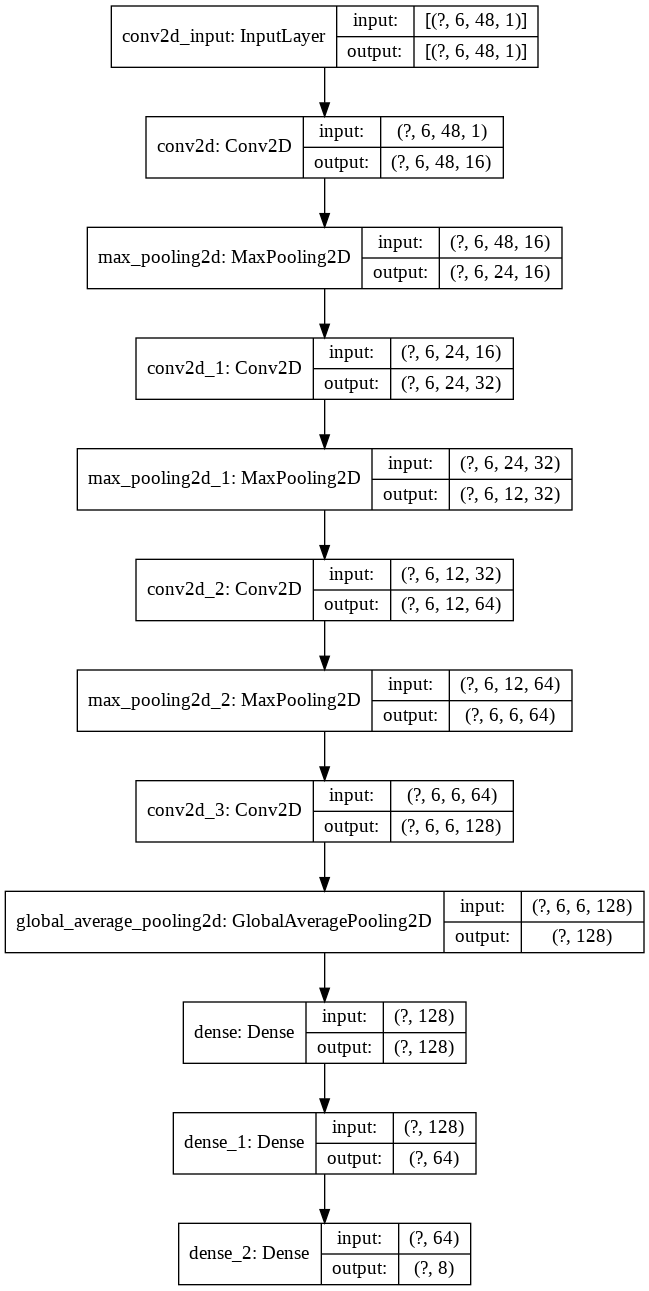

In [ ]:
from IPython.display import Image
Image('model.png')

###모델 예측

각 요소는 아래의 cnn_real_predictions와 같은 predict로 부터 저런식으로 추출.
<br>
가장 마지막 layer가 softmax이므로 확률분포이다
<br>-> numpy.argmax를 통해 예측값을 뽑아낸다.

In [ ]:
'''
#cnn_real_predictions = cnn_model.predict(re_c_data)
txt = 'Pred_Direction,Real_Direction\n'
count = 0
for temp in re_c_data:
  if(np.argmax(cnn_real_predictions[count]) == 0):
  #  print('straight')
    txt = txt + 'straight,'
  elif(np.argmax(cnn_real_predictions[count]) == 1):
  #  print('left')
    txt = txt + 'curve_left,'
  elif(np.argmax(cnn_real_predictions[count]) == 2):
    txt = txt + 'curve_right,'
  elif(np.argmax(cnn_real_predictions[count]) == 3):
    txt = txt + 'left,' 
  elif(np.argmax(cnn_real_predictions[count]) == 4):
    txt = txt + 'right,'
  elif(np.argmax(cnn_real_predictions[count]) == 5):
    txt = txt + 'change_left,'
  elif(np.argmax(cnn_real_predictions[count]) == 6):
    txt = txt + 'change_right,'
  else:
    txt = txt + 'stop,'
  if(real_file_label[count] == 0):
    txt = txt + 'straight\n'
  elif(real_file_label[count] == 1):
    txt = txt + 'curve_left\n'
  elif(real_file_label[count] == 2):
    txt = txt + 'curve_right\n'
  elif(real_file_label[count] == 3):
    txt = txt + 'left\n'
  elif(real_file_label[count] == 4):
    txt = txt + 'right\n' 
  elif(real_file_label[count] == 5):
    txt = txt + 'change_left\n'
  elif(real_file_label[count] == 6):
    txt = txt + 'change_right\n'
  else:
    txt = txt + 'stop\n'
  count = count + 1
'''